In [13]:
import numpy as np
import numpy.random as rn
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from math import log, factorial
from scipy.optimize import minimize

In [14]:
## q1

In [15]:
vax_data = pd.read_csv('/Users/giovannimaya/Downloads/data/PCC_study_train.csv')
vax_data

,Unnamed: 0,vax_status,WBscore,PCCsymp
0,1,Vaccinated,Improved,Less
1,2,Vaccinated,Unchanged,Less
2,3,Vaccinated,Improved,Less
3,4,Vaccinated,Worsened,Less
4,5,Vaccinated,Worsened,More
...,...,...,...,...
70,71,Unvaccinated,Unchanged,Less
71,72,Unvaccinated,Worsened,Same
72,73,Unvaccinated,Improved,Same
73,74,Unvaccinated,Unchanged,More


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import statsmodels.api as sm
dummies_dta = pd.get_dummies(
    vax_data, columns=['WBscore', 'PCCsymp'], drop_first=True)
X = dummies_dta.drop(['Unnamed: 0', 'vax_status'], axis=1)
X = X.astype(float)
y = dummies_dta['vax_status'].apply(lambda x: 1 if x == 'Vaccinated' else 0)

model = sm.Logit(y, sm.add_constant(X))
result = model.fit()

result.summary()

# from this, we can see that PCCsymp_same and WBScore_unchanged are the most signigicant with 
# values from significantly less than 0.05.

Optimization terminated successfully.
         Current function value: 0.408057
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             vax_status   No. Observations:                   75
Model:                          Logit   Df Residuals:                       70
Method:                           MLE   Df Model:                            4
Date:                Thu, 11 Apr 2024   Pseudo R-squ.:                  0.4106
Time:                        22:17:21   Log-Likelihood:                -30.604
converged:                       True   LL-Null:                       -51.926
Covariance Type:            nonrobust   LLR p-value:                 1.227e-08
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.9769      0.521      3.791      0.000       0.955       2.999
WBscore_Unchanged    -2.0144      0.755     -2.668      0.008      -3.494      -0.535
WBscore_Worsened     -1.0089      1.012     -0.997      0.319      -2.993       0.975
PCCsymp_More         -2.4890      1.069     -2.327      0.020      -4.585      -0.393
PCCsymp_Same         -2.7364      0.836     -3.275      0.001      -4.374      -1.099
=====================================================================================
"""

In [32]:
train_df1 = vax_data.copy().drop(columns=['Unnamed: 0'])

ordinal_mapping_WBscore = {'Worsened': 0, 'Unchanged': 1, 'Improved': 2}
ordinal_mapping_PCCsymp = {'Less': 0, 'Same': 1, 'More': 2}

train_df1['WBscore'] = train_df1['WBscore'].map(ordinal_mapping_WBscore)
train_df1['PCCsymp'] = train_df1['PCCsymp'].map(ordinal_mapping_PCCsymp)

###############################################
# Preparing the training data                 #
###############################################
to_int_dict = {'Unvaccinated': 0, 'Vaccinated': 1}
train_df1['vax_status'] = train_df1['vax_status'].replace(to_int_dict)

predictors = train_df1.columns[1:]
outcome = train_df1.columns[0]

X_train_num = train_df1[predictors]
y_train_num = train_df1[outcome] 

##############################################
# Initialize an instance of the model object #
##############################################
model_num = sm.Logit(y_train_num, X_train_num)

##########################################
# Train the model / fit model parameters #
##########################################
log_reg_num = model_num.fit() 
print(log_reg_num.summary())

Optimization terminated successfully.
         Current function value: 0.468641
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             vax_status   No. Observations:                   75
Model:                          Logit   Df Residuals:                       73
Method:                           MLE   Df Model:                            1
Date:                Thu, 11 Apr 2024   Pseudo R-squ.:                  0.3231
Time:                        23:44:27   Log-Likelihood:                -35.148
converged:                       True   LL-Null:                       -51.926
Covariance Type:            nonrobust   LLR p-value:                 6.925e-09
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
WBscore        0.7260      0.209      3.471      0.001       0.316       1.136
PCCsymp       -1.7714      0.

In [33]:
# part c 
vax_data = pd.read_csv(
    '/Users/giovannimaya/Downloads/data/PCC_study_train.csv')
numeric_mapping = {
    'WBscore': {'Improved': 2, 'Unchanged': 1, 'Worsened': 0},
    'PCCsymp': {'More': 2, 'Same': 1, 'Less': 0}
}

train_data_numeric = vax_data.replace(numeric_mapping)
X_numeric = train_data_numeric[['WBscore', 'PCCsymp']]
y_numeric = train_data_numeric['vax_status'].apply(
    lambda x: 1 if x == 'Vaccinated' else 0)

X_numeric = X_numeric.astype(float)

model_numeric = sm.Logit(y_numeric, sm.add_constant(X_numeric))
result_numeric = model_numeric.fit()

print(result_numeric.summary())

    Unnamed: 0    vax_status  WBscore  PCCsymp
0            1    Vaccinated        2        0
1            2    Vaccinated        1        0
2            3    Vaccinated        2        0
3            4    Vaccinated        0        0
4            5    Vaccinated        0        2
..         ...           ...      ...      ...
70          71  Unvaccinated        1        0
71          72  Unvaccinated        0        1
72          73  Unvaccinated        2        1
73          74  Unvaccinated        1        2
74          75  Unvaccinated        1        1

[75 rows x 4 columns]
Optimization terminated successfully.
         Current function value: 0.466680
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             vax_status   No. Observations:                   75
Model:                          Logit   Df Residuals:                       72
Method:                           MLE   Df Model:                         

In [18]:
# from this we can see that the variable is PCCsymp is the significant in this case.

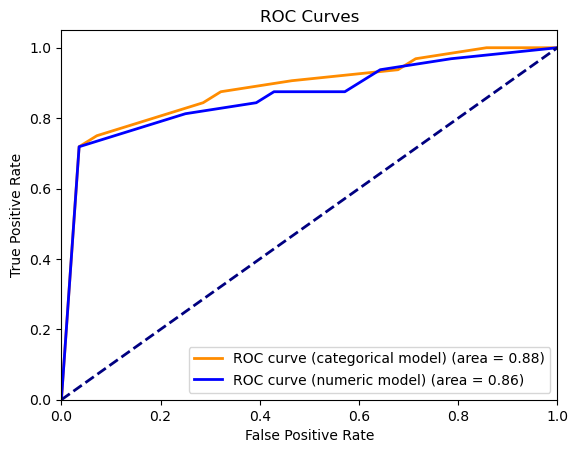

(0.8828125, 0.8627232142857143)

In [19]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
test_data = pd.read_csv(
    '/Users/giovannimaya/Downloads/data/PCC_study_test.csv')

test_data_encoded = pd.get_dummies(
    test_data, columns=['WBscore', 'PCCsymp'], drop_first=True)
X_test_cat = test_data_encoded.drop(
    ['Unnamed: 0', 'vax_status'], axis=1).astype(float)
y_test_cat = test_data_encoded['vax_status'].apply(
    lambda x: 1 if x == 'Vaccinated' else 0)

y_pred_cat_prob = result.predict(sm.add_constant(X_test_cat))

test_data_numeric = test_data.replace(numeric_mapping)
X_test_numeric = test_data_numeric[['WBscore', 'PCCsymp']].astype(float)
y_test_numeric = test_data_numeric['vax_status'].apply(
    lambda x: 1 if x == 'Vaccinated' else 0)

y_pred_numeric_prob = result_numeric.predict(sm.add_constant(X_test_numeric))

fpr_cat, tpr_cat, _ = roc_curve(y_test_cat, y_pred_cat_prob)
roc_auc_cat = auc(fpr_cat, tpr_cat)

fpr_numeric, tpr_numeric, _ = roc_curve(y_test_numeric, y_pred_numeric_prob)
roc_auc_numeric = auc(fpr_numeric, tpr_numeric)

plt.figure()
lw = 2
plt.plot(fpr_cat, tpr_cat, color='darkorange',
         lw=lw, label='ROC curve (categorical model) (area = %0.2f)' % roc_auc_cat)
plt.plot(fpr_numeric, tpr_numeric, color='blue',
         lw=lw, label='ROC curve (numeric model) (area = %0.2f)' % roc_auc_numeric)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")
plt.show()

roc_auc_cat, roc_auc_numeric

In [20]:
# the auc for the categorical model is 0.88, slightly outperforming the numerical model with 0.86. 
# this would mean I would recommend the categorical model. 

In [21]:
#q2

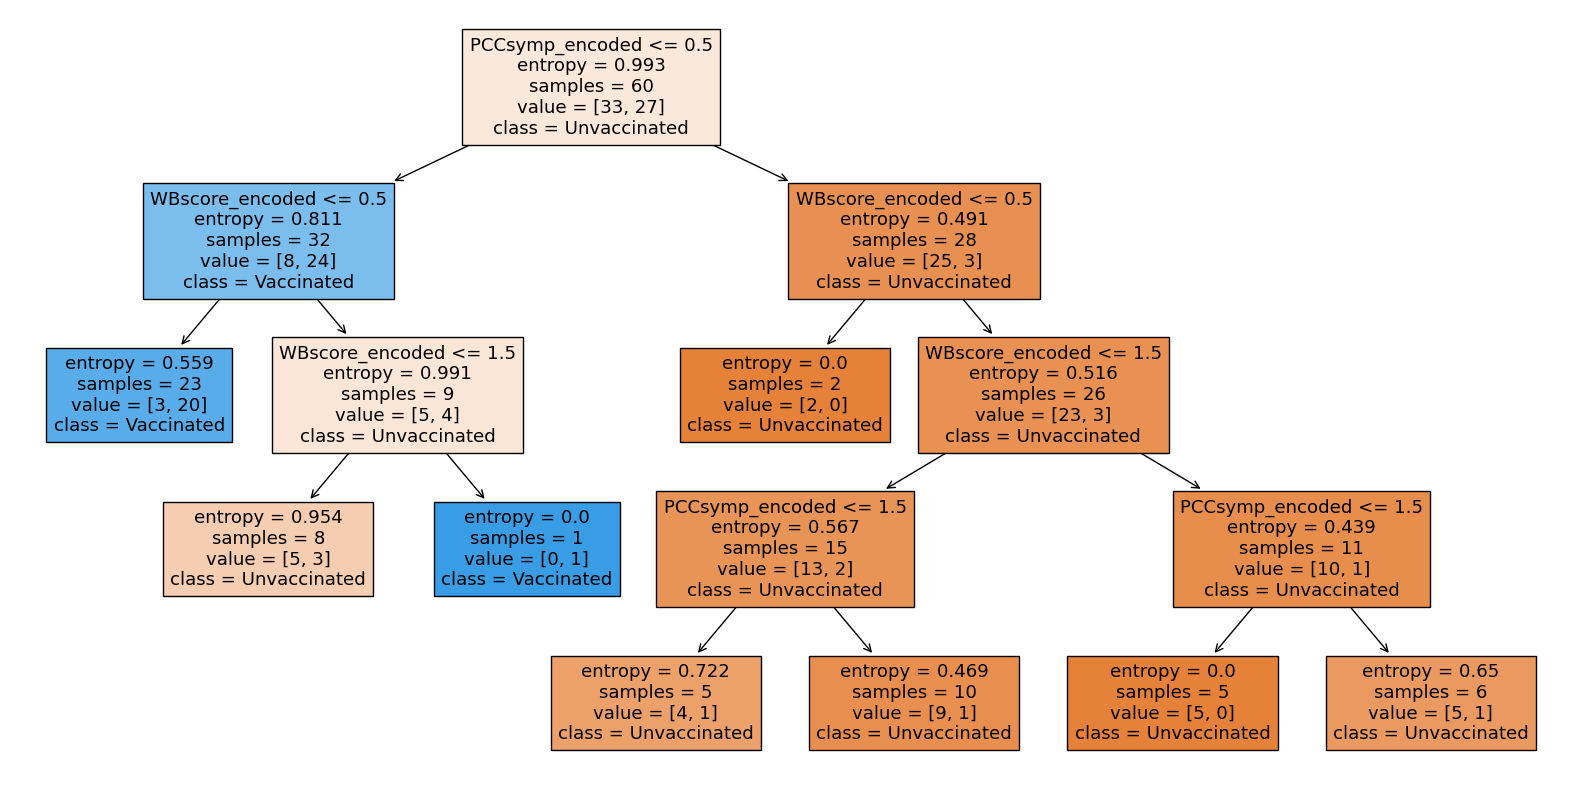

In [22]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
train_data = pd.read_csv('/Users/giovannimaya/Downloads/data/PCC_study_train.csv')
le_vax_status = LabelEncoder()
le_pccsymp = LabelEncoder()
le_WBscore = LabelEncoder()
train_data['vax_status_encoded'] = le_vax_status.fit_transform(train_data['vax_status'])
train_data['WBscore_encoded'] = le_WBscore.fit_transform(train_data['WBscore'])
train_data['PCCsymp_encoded'] = le_pccsymp.fit_transform(train_data['PCCsymp'])
X_tree = train_data[['WBscore_encoded', 'PCCsymp_encoded']]
y_tree = train_data['vax_status_encoded']

X_train, X_test, y_train, y_test = train_test_split(X_tree, y_tree, test_size=0.2, random_state=42)
dt = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt.fit(X_train, y_train)
plt.figure(figsize=(20, 10))
plot_tree(dt, filled=True, feature_names=[
          'WBscore_encoded', 'PCCsymp_encoded'], class_names=le_vax_status.classes_)
plt.show()

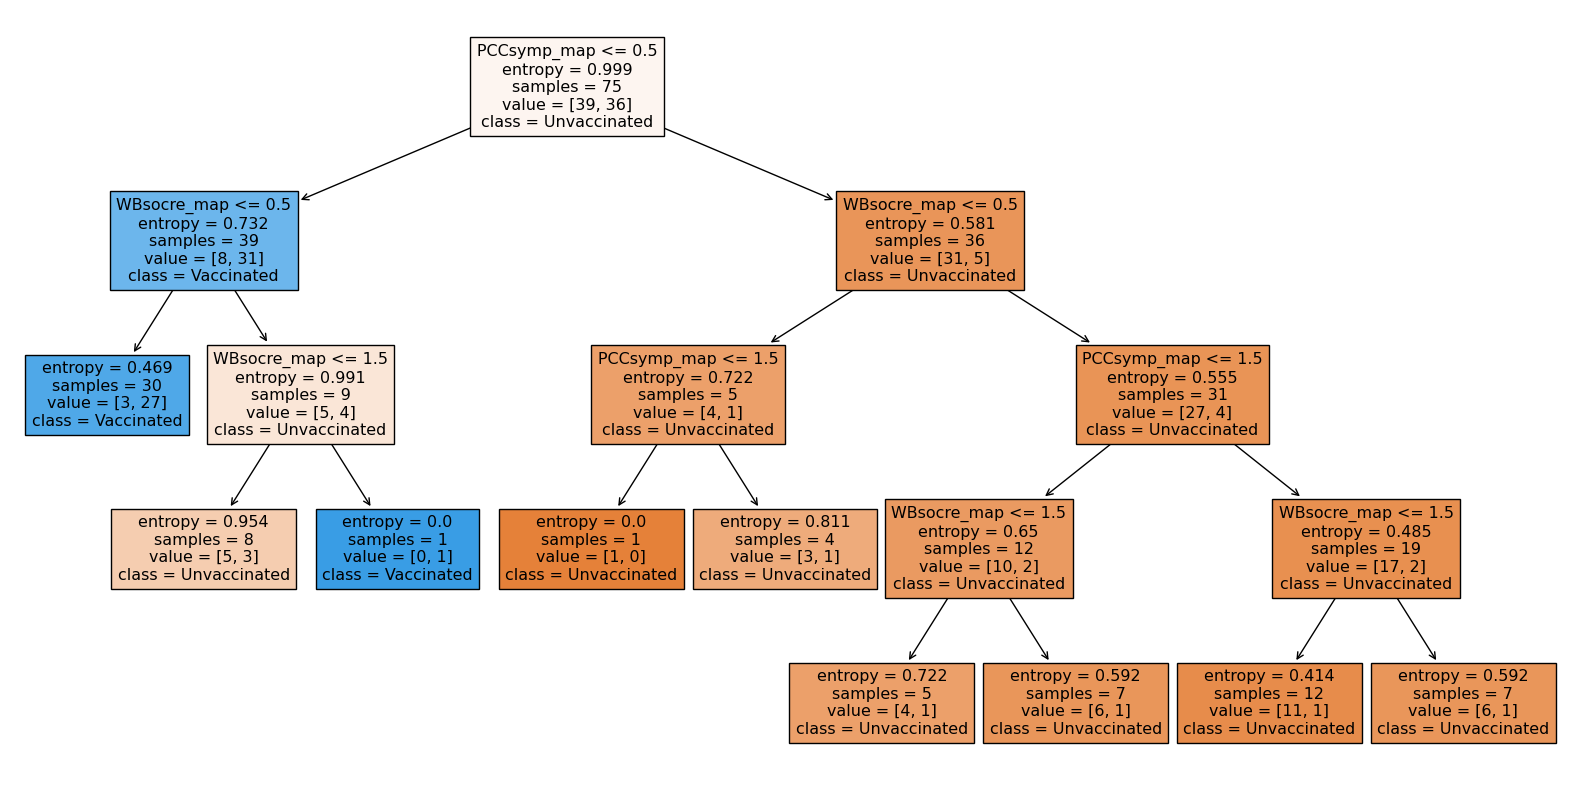

Decision Tree AUC: 0.8431919642857144


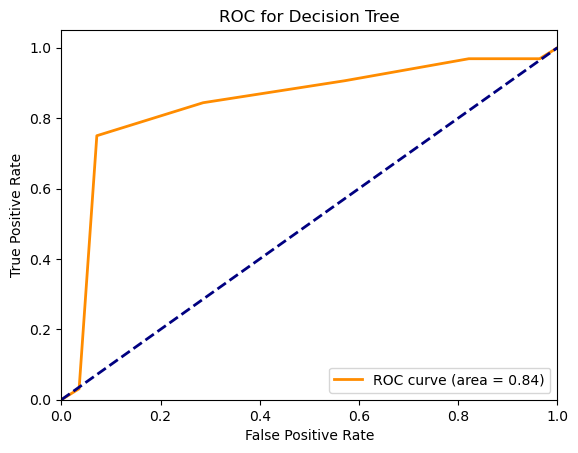

In [31]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier  # Import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
import pandas as pd


train_data = pd.read_csv(
    '/Users/giovannimaya/Downloads/data/PCC_study_train.csv')
test_data = pd.read_csv(
    '/Users/giovannimaya/Downloads/data/PCC_study_test.csv')

le_WBscore = LabelEncoder()
le_PCCsymp = LabelEncoder()
le_vax_status = LabelEncoder()

train_data['WBsocre_map'] = le_WBscore.fit_transform(train_data['WBscore'])
train_data['PCCsymp_map'] = le_PCCsymp.fit_transform(train_data['PCCsymp'])
train_data['vax_status_map'] = le_vax_status.fit_transform(train_data['vax_status'])

test_data['WBsocre_map'] = le_WBscore.transform(test_data['WBscore'])
test_data['PCCsymp_map'] = le_PCCsymp.transform(test_data['PCCsymp'])
test_data['vax_status_map'] = le_vax_status.transform(test_data['vax_status'])

X_train = train_data[['WBsocre_map', 'PCCsymp_map']]
y_train = train_data['vax_status_map']

dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=42)

dt_classifier.fit(X_train, y_train)
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, filled=True, feature_names=[
          'WBsocre_map', 'PCCsymp_map'], class_names=le_vax_status.classes_)
plt.show()

X_test = test_data[['WBsocre_map', 'PCCsymp_map']]
y_act = test_data['vax_status_map']

dt_probabilities = dt_classifier.predict_proba(X_test)[:, 1]

fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_act, dt_probabilities)
roc_auc_dt = auc(fpr_dt, tpr_dt)

print("Decision Tree AUC:", roc_auc_dt)

plt.figure()
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Decision Tree')
plt.legend(loc="lower right")
plt.show()

In [24]:
def minf(x: int, y: int, step_size: int, K: int) -> list[tuple[int, int]]:
    def det_gradient(x: int, y: int) -> tuple[int, int]:
        x_grad = 4*x**3 - 2*x
        y_grad = 4*y**3 - 2*y
        return (x_grad, y_grad)
    
    steps = [(x, y)]
    for _ in range(K):
        x_grad, y_grad = det_gradient(x, y)
        x -= step_size * x_grad
        y -= step_size * y_grad

        steps.append((x, y))
    return steps


In [25]:
minf(2, 4, 0.01, 15)[-1]

(0.9547150306784077, 0.9355597040857274)

In [26]:
minf(2, 4, 0.02, 15)[-1]

(0.7994090786939718, -0.7616288410761938)

In [27]:
minf(-1, -1, 0.01, 15)[-1]

(-0.8263575900611708, -0.8263575900611708)

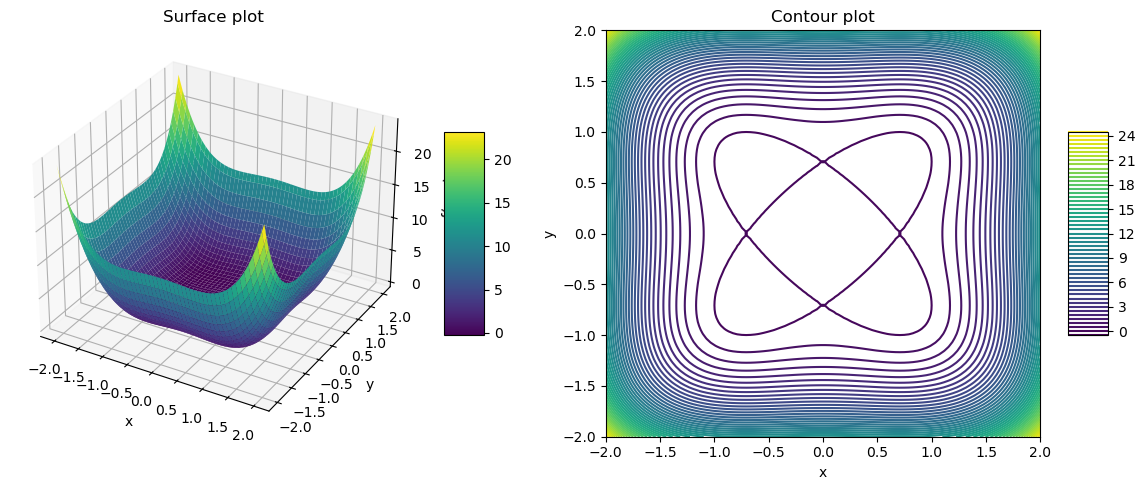

In [28]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return x**4 + y**4 - x**2 - y**2 + 0.25

x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
ax1.set_title('Surface plot')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('f(x, y)')
fig.colorbar(surf, ax=ax1, shrink=0.5, aspect=5)

ax2 = fig.add_subplot(122)
contour = ax2.contour(X, Y, Z, 50, cmap='viridis')
ax2.set_title('Contour plot')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
fig.colorbar(contour, ax=ax2, shrink=0.5, aspect=5)

plt.tight_layout()
plt.show()